# 1. Introduction to PyTorch deeplearning framework.
## Installation

To start using PyTorch, install it by running the following command in your terminal or command prompt (in Google Colab PyTorch is already installed):

`pip install torch`

In [17]:
import torch

In [18]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


## Creating Tensors

In [19]:
# Create a tensor from a list/array
tensor_a = torch.tensor([1, 4, 1 , 3])

# Create a 2x3 matrix (2D tensor) with random values
tensor_b = torch.randn((256,256))

In [20]:
print(tensor_b.shape)
print(tensor_b.unsqueeze(0).size())

torch.Size([256, 256])
torch.Size([1, 256, 256])


In [21]:
# Create a 2x3 matrix (2D tensor) with zeros
tensor_c = torch.eye(3)
tensor_c

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [22]:
img = tensor_b.unsqueeze(0).unsqueeze(0).unsqueeze(0).unsqueeze(0)
print(img.shape)

torch.Size([1, 1, 1, 1, 256, 256])


In [23]:
import matplotlib.pyplot as plt

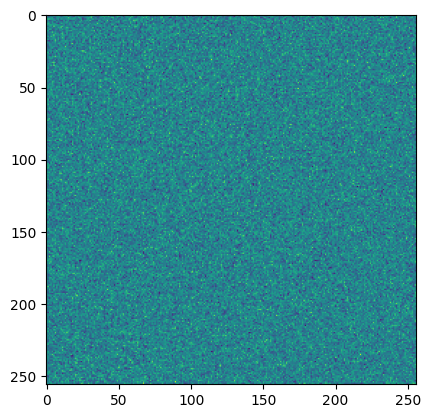

In [24]:
plt.imshow(img.squeeze())

In [25]:
tensor_a = tensor_a.unsqueeze(0)

In [26]:
tensor_a

tensor([[1, 4, 1, 3]])

In [27]:
tensor_a.transpose(0,1)

tensor([[1],
        [4],
        [1],
        [3]])

In [28]:
tensor_a = tensor_a.squeeze(0)
tensor_a

tensor([1, 4, 1, 3])

In [29]:
tensor_a = tensor_a.unsqueeze(0)
tensor_a

tensor([[1, 4, 1, 3]])

In [30]:
matrix_mul = torch.mm(tensor_a.T,tensor_a)
matrix_mul

tensor([[ 1,  4,  1,  3],
        [ 4, 16,  4, 12],
        [ 1,  4,  1,  3],
        [ 3, 12,  3,  9]])

In [31]:
torch.linalg.det(matrix_mul.float())

tensor(-0.)

In [32]:
matrix_11 = torch.tensor([30])

In [33]:
matrix_11.squeeze(0).squeeze(0)

tensor(30)

In [34]:
matrix_11.squeeze()

tensor(30)

In [35]:
matrix_11.item()

30

In [36]:
matrix_11 = matrix_11.cuda()

In [37]:
tensor_b.item()

RuntimeError: a Tensor with 65536 elements cannot be converted to Scalar

In [ ]:
# Create a zero matrix (2D tensor) with the shape of tensor_b
tensor_d = torch.zeros_like(tensor_c)

In [ ]:
tensor_d.size() == tensor_c.size()

In [ ]:
# check if it is the same
tensor_c == tensor_d

In [ ]:
# arbitraty dimensional tensor filled with the scalar value 1 (torch.ones_like also works)
torch.ones(2,3)

In [ ]:
# diagonal 2D tensor
# torch.eye(3)
# torch.eye(3,3)
# torch.eye(3,2)

In [ ]:
# display tensor shape
tensor_c.shape

In [ ]:
# transpose and display shape
tensor_c.T

In [ ]:
#create random tensor of arbitrary shape
tensor_r = torch.rand(3,3,3)

Task 1: Create a matrix representing a simple system of linear equations and solve it using a function from torch.linalg package.

In [9]:
import torch

# 2x + 3y = 5
# 4x + y = 6
# Ax = B

A = torch.tensor([[2.0, 3.0],
                  [4.0, 1.0]])

B = torch.tensor([5.0, 6.0])

x = torch.linalg.solve(A, B)

print(x)

tensor([1.3000, 0.8000])


## Operations with tensors

### Algebraic operations

In [10]:
# basic tensor operations
tensor_c + 5
# tensor_c - 5
# tensor_c * 5
# tensor_c / 5

tensor([[6., 5., 5.],
        [5., 6., 5.],
        [5., 5., 6.]])

In [11]:
# element-wise multiplication
tensor_a = torch.randn(3,2)
tensor_c = torch.mul(tensor_a, tensor_a)

In [13]:
# matrix multiplication
tensor_a = torch.randn(3,2)
tensor_d = torch.randn(2,3)
tensor_c = torch.mm(tensor_a, tensor_d)

In [14]:
tensor_a @ tensor_d == torch.mm(tensor_a, tensor_d)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### Reshaping

In [ ]:
tensor = torch.randn(3,3,3)

In [ ]:
tensor.shape

In [ ]:
tensor_one = tensor.view((3, -1, 1, 1))

In [ ]:
tensor_one.size()

In [ ]:
tensor_transposed = tensor.transpose(0, 2)

In [ ]:
tensor_two = tensor_transposed.view((-1, 1, 1))

A contiguous tensor is a tensor whose elements are stored in a contiguous block of memory, with no extra padding or space between the elements. A tensor is said to be contiguous if it follows the “row-major” order, meaning that the elements are stored in memory in a consecutive order, row by row.

The contiguous() function is essential in PyTorch because it ensures that the tensor data is stored in a contiguous block of memory. This memory layout is required for efficient tensor operations as it allows the CPU or GPU to access the tensor elements in a consecutive order.

When we perform tensor operations, the PyTorch engine expects the tensor data to be stored in a contiguous block of memory. If the tensor is non-contiguous, PyTorch must first convert it to a contiguous tensor before performing any operation. This conversion can be time-consuming and can significantly slow down the computation.

In [15]:
# tensor_transposed = tensor_transposed.contiguous()
# tensor_two = tensor_transposed.view((-1, 1, 1))

# alternatively
tensor_two = tensor_transposed.reshape((-1, 1, 1))

NameError: name 'tensor_transposed' is not defined

In [16]:
# add/remove dimesions

# (1,3,3,1,3,1)

tensor = torch.randn(3,3,3)
tensor = tensor.unsqueeze(0).unsqueeze(3).unsqueeze(-1)
print(tensor.shape)

torch.Size([1, 3, 3, 1, 3, 1])


In [ ]:
tensor = tensor.squeeze(0).squeeze(2)
print(tensor.shape)

### Casting

In [ ]:
# cast tensor to float dtype
tensor = torch.randn(3,3,3)
print(tensor)
print(tensor.dtype)
tensor2 = tensor.int()
print(tensor2)
print(tensor2.dtype)

### Normalization

In [38]:
# clamp the tensor elements within the specified range
tensor_clamp = torch.clamp(tensor, min=-1, max=3)

In [39]:
# tensor_clamp.max()
tensor_clamp.min()

tensor(-1.)

In [40]:
# normalize the tensor along the specified dimension
tensor_norm = torch.nn.functional.normalize(tensor, p=2, dim=1)
tensor_norm

tensor([[[[[[ 0.4114],
            [ 0.0947],
            [ 0.3108]]],


          [[[ 0.6542],
            [ 0.3940],
            [ 0.0399]]],


          [[[ 0.5648],
            [-0.3563],
            [ 0.3006]]]],



         [[[[-0.7102],
            [-0.9260],
            [-0.9483]]],


          [[[-0.6429],
            [ 0.1975],
            [ 0.4139]]],


          [[[-0.3767],
            [ 0.5090],
            [ 0.9536]]]],



         [[[[-0.5713],
            [-0.3655],
            [-0.0635]]],


          [[[-0.3984],
            [-0.8976],
            [ 0.9095]]],


          [[[ 0.7342],
            [ 0.7836],
            [ 0.0190]]]]]])

Task 2: try other normalisation functions (look for functions ending with _norm in nn.functional).

In [102]:
# Layer Normalization: normalizes across the features in a single data point

# Create a 2D tensor (batch_size, features)
input_tensor = torch.randn(10, 5)

# Apply layer normalization on each eg.
output_tensor = torch.nn.functional.layer_norm(input_tensor, normalized_shape=(5,))

print(output_tensor)


tensor([[-0.7337,  0.3973, -1.2615,  1.6462, -0.0483],
        [ 0.6861,  1.3357,  0.2173, -1.4286, -0.8105],
        [-0.1477, -0.8417,  1.9356, -0.2792, -0.6670],
        [ 1.0638,  0.5897, -0.8310,  0.7049, -1.5274],
        [-0.3760, -0.9024,  1.9129, -0.0142, -0.6203],
        [-0.7172,  1.9599, -0.1765, -0.3834, -0.6828],
        [ 0.9247, -0.1636,  0.6446,  0.4621, -1.8678],
        [-1.3651, -0.4496,  1.6463,  0.4081, -0.2397],
        [-0.3110,  1.7755, -0.0354, -1.3180, -0.1111],
        [-0.9256,  0.5272, -1.3098,  0.2664,  1.4418]])


### Gradient computation

In [103]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()  # Computes the gradient dy/dx at x = 2

### Computation on GPU

In [104]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [105]:
print(device)

cuda


In [106]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


To enable GPU in Google Colab go to: Edit -> Notebook settings, then chose: T4 GPU


In [107]:
# send tensor to GPU:
x = torch.randn(1, requires_grad=True)
# x = x.to(device)

# alternatively:
x.cuda()
# x.to('cuda')

# send back to CPU
# x.cpu()
# x.to('cpu')

tensor([-1.3104], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [108]:
x.item()

-1.3104232549667358

In [109]:
output = []

In [110]:
output.append(x)

In [111]:
x.detach().cpu().numpy()

array([-1.3104233], dtype=float32)

## Neural Networks with PyTorch

### last year practice with more low level details: https://drive.google.com/file/d/15Y3rbwRpaXc2gTqX3KhxLBe_2ahQ-wQb/view?usp=sharing

In [112]:
import torch
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(10,7)})

In [113]:
def sigmoid(z):
    return 1. / (1. + torch.exp(-z))

In [115]:
# Generate the dataset
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2)) # Define target matrix
T[t==1, 1] = 1
T[t==0, 0] = 1
# Separate the red and blue samples for plotting
x_red = X[t==0]
x_blue = X[t==1]

print('shape of X: {}'.format(X.shape))
print('shape of T: {}'.format(T.shape))

shape of X: (100, 2)
shape of T: (100, 2)


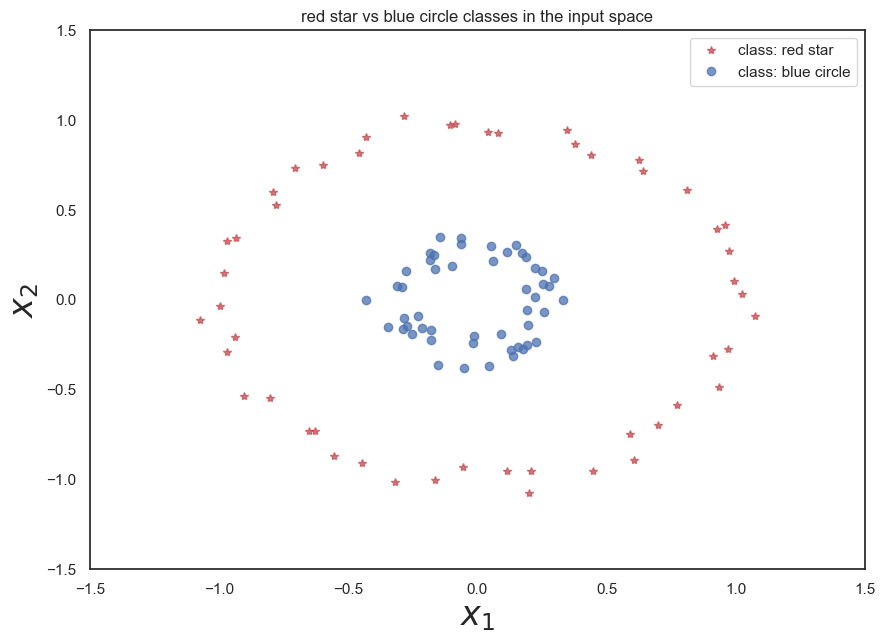

In [116]:
# Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'r*',
         label='class: red star', alpha=0.75)
plt.plot(x_blue[:,0], x_blue[:,1], 'bo',
         label='class: blue circle', alpha=0.75)
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=24)
plt.ylabel('$x_2$', fontsize=24)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red star vs blue circle classes in the input space')
plt.show()

In [117]:
class Model(torch.nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear1 = torch.nn.Linear(in_features = input_size, out_features = H1)
        self.linear2 = torch.nn.Linear(H1, output_size)
    def forward(self, x):
        x1 = torch.nn.functional.tanh(self.linear1(x))
        x2 = self.linear2(x1)
        return sigmoid(x2)
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [136]:
# model = Model(2, 1, 1)
# model = Model(2, 3, 1)
# model = Model(2, 5, 1)
model = Model(2, 10, 1)

In [138]:
model.linear1

Linear(in_features=2, out_features=10, bias=True)

In [139]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.3142, -0.6551],
        [-0.2536,  0.5086],
        [ 0.6296, -0.1466],
        [ 0.4457,  0.5301],
        [-0.4781, -0.3810],
        [ 0.6357, -0.4922],
        [-0.5339,  0.4524],
        [ 0.3435, -0.4830],
        [-0.3383, -0.4633],
        [ 0.4530, -0.1000]], requires_grad=True), Parameter containing:
tensor([ 0.2710,  0.6547, -0.2435, -0.1480,  0.6876,  0.2320,  0.1848, -0.3240,
        -0.3139,  0.2582], requires_grad=True), Parameter containing:
tensor([[-0.2264,  0.0565, -0.2240, -0.1334,  0.2060,  0.1501,  0.2779,  0.2595,
         -0.2105,  0.2389]], requires_grad=True), Parameter containing:
tensor([-0.1712], requires_grad=True)]


In [140]:
criterion = torch.nn.BCELoss()
# criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [141]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

In [142]:
epochs = 1000
losses = []

for i in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data.float())
    #print("epoch:", i, "loss", loss.item())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

Text(0.5, 0, 'epoch')

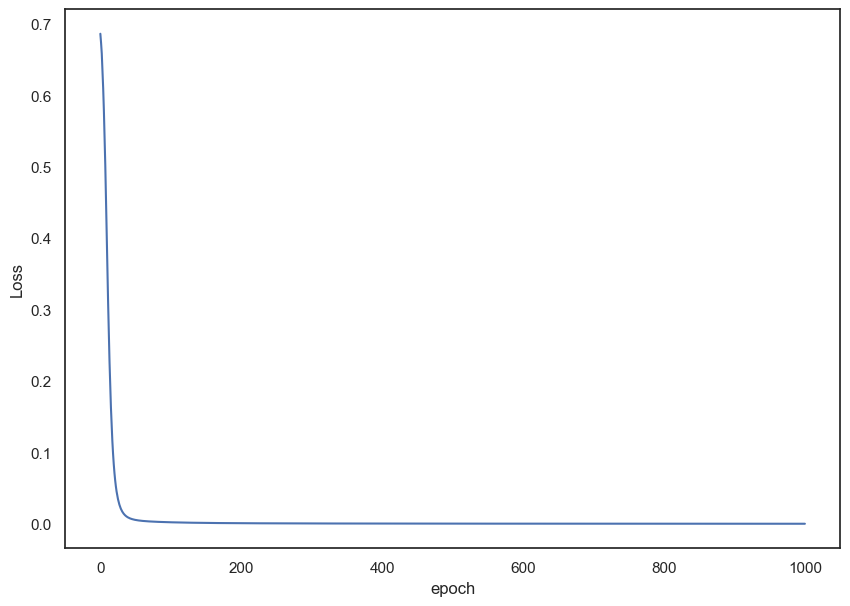

In [143]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [144]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) -0.5, max(X[:, 0]) + 0.5)
    y_span = np.linspace(min(X[:, 1]) -0.5, max(X[:, 1]) + 0.5)

    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).cpu().detach().numpy()
    plt.contourf(xx, yy, z)

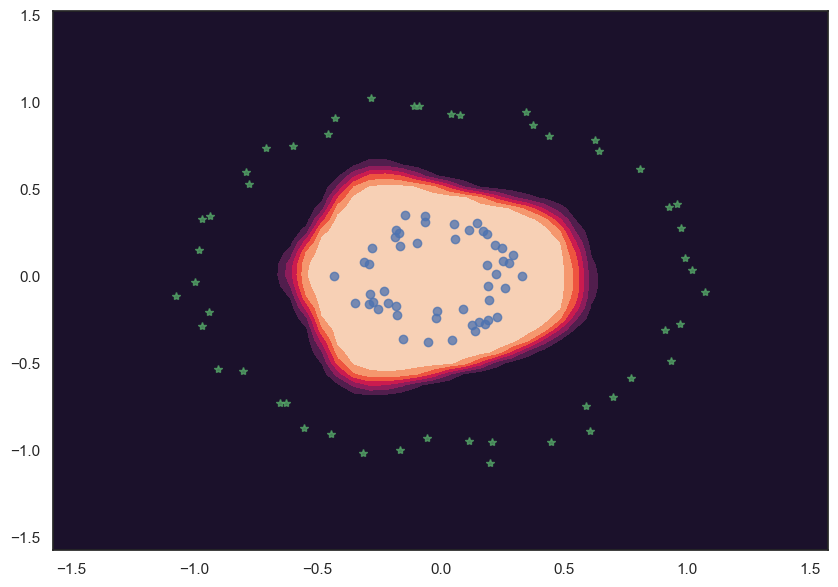

In [145]:
# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:,0], x_red[:,1], 'g*',
         label='class: red star', alpha=0.75)
plt.plot(x_blue[:,0], x_blue[:,1], 'bo',
         label='class: blue circle', alpha=0.75)

Task 3: Experiment with the architecture of the neural net and observe the effect of the changes on the classification and regions.

# ⚠️⚠️⚠️ Homework ⚠️⚠️⚠️

* Rewrite the neural network above withot using torch.nn.Linear (you can use torch.tensor to define weights and biases)
* Try to add more layers. How does it affect trainining loss evolution?

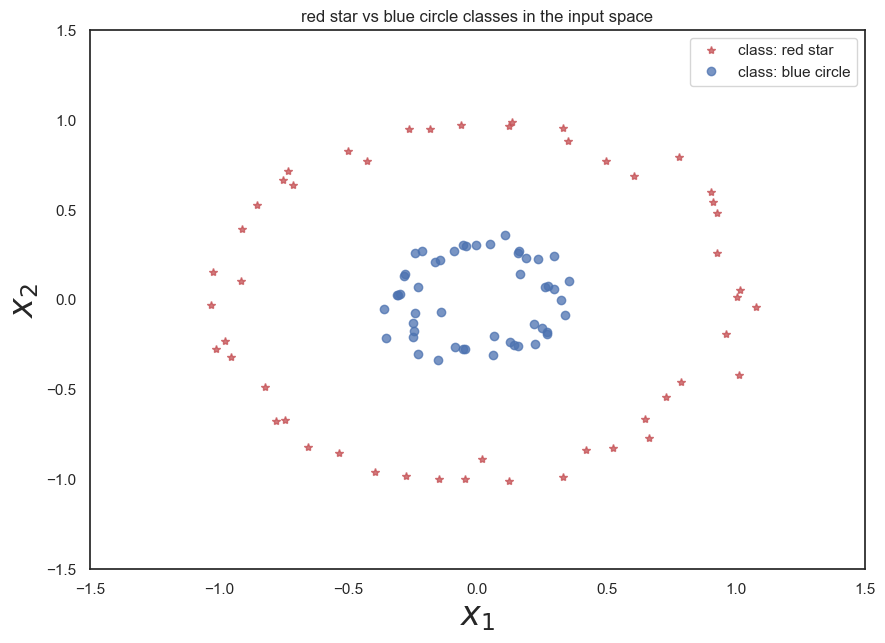

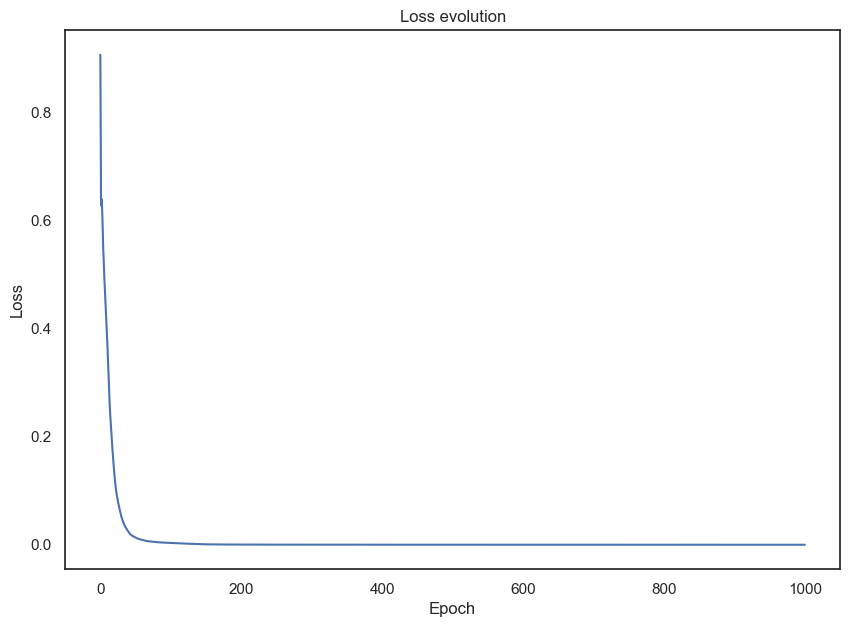

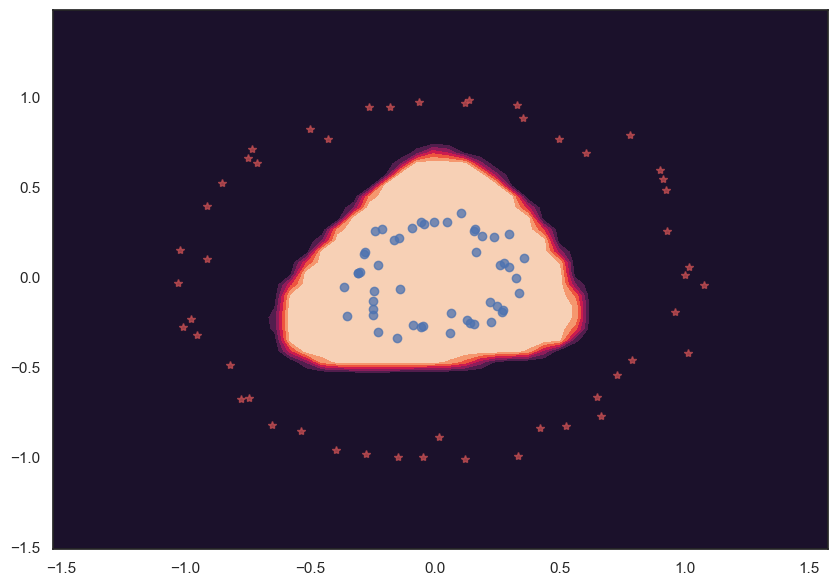

In [1]:
import torch
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize': (10, 7)})

def sigmoid(z):
    return 1. / (1. + torch.exp(-z))

# Generate the dataset
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1
# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'r*',
         label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo',
         label='class: blue circle', alpha=0.75)
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=24)
plt.ylabel('$x_2$', fontsize=24)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red star vs blue circle classes in the input space')
plt.show()

class ManualModel:
    def __init__(self, input_size, H1, H2, output_size):
        self.W1 = torch.randn(input_size, H1, requires_grad=True)  # Input to H1 weights
        self.b1 = torch.zeros(H1, requires_grad=True)  # H1 biases
        
        self.W2 = torch.randn(H1, H2, requires_grad=True)  # H1 to H2 weights
        self.b2 = torch.zeros(H2, requires_grad=True)  # H2 biases
        
        self.W3 = torch.randn(H2, output_size, requires_grad=True)  # H2 to output weights
        self.b3 = torch.zeros(output_size, requires_grad=True)  # Output biases

    def forward(self, x):
        z1 = torch.matmul(x, self.W1) + self.b1
        a1 = torch.tanh(z1)  # Activation after layer 1
        
        z2 = torch.matmul(a1, self.W2) + self.b2
        a2 = torch.tanh(z2)  # Activation after layer 2
        
        z3 = torch.matmul(a2, self.W3) + self.b3
        return sigmoid(z3)  # Output layer with sigmoid activation
    
    def predict(self, x):
        pred = self.forward(x)
        return (pred >= 0.5).float()

# Initialise the model with more layers
model = ManualModel(2, 10, 5, 1)

# Training setup
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam([model.W1, model.b1, model.W2, model.b2, model.W3, model.b3], lr=0.1)

# Training loop
epochs = 1000
losses = []

for i in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot loss evolution
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss evolution')
plt.show()

# Plot decision boundary
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
    y_span = np.linspace(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)

    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).cpu().detach().numpy()
    plt.contourf(xx, yy, z)

plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'r*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.show()


In [ ]:
# Increasing the number of layers increases the network's capacity, allowing it to model more complex functions. 
# This can improve learning but might also slow down training or lead to overfitting if it is not regularised properly.
# In this case, adding more layers should help the model capture the complex circular boundary of the dataset more effectively. 
# The loss may decrease faster or stabilise at a lower value compared to a simpler model.

# Chew Ming Hui